In [3]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#loading the data
data = pd.read_csv('Salary_Data.csv')

In [5]:
#dependent and independent data
X = data.iloc[:, 0].values
y = data.iloc[:, 1].values

In [6]:
print(X)#loading the data

[ 1.1  1.3  1.5  2.   2.2  2.9  3.   3.2  3.2  3.7  3.9  4.   4.   4.1
  4.5  4.9  5.1  5.3  5.9  6.   6.8  7.1  7.9  8.2  8.7  9.   9.5  9.6
 10.3 10.5]


In [7]:
#splitting the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
# random_state = 0 "obtain consistent results across multiple runs"

In [8]:
print(y_train)

[112635  55794  83088 101302  56642  66029  64445  61111 113812  91738
  46205 121872  60150  39891  81363  93940  57189  54445 105582  43525
  39343  98273  67938  56957]


In [9]:
print(X_test)

[ 1.5 10.3  4.1  3.9  9.5  8.7]


In [10]:
print(y_test)


[ 37731 122391  57081  63218 116969 109431]


In [11]:
print(y_train)

[112635  55794  83088 101302  56642  66029  64445  61111 113812  91738
  46205 121872  60150  39891  81363  93940  57189  54445 105582  43525
  39343  98273  67938  56957]


In [12]:
# scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train.reshape(-1,1))
X_test = sc_X.transform(X_test.reshape(-1,1))
#reshape transforms single feature or a 1D array to 2D array of shape required during fitting 

In [13]:
#fitting the Decision Tree model to the training set
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train.reshape(-1,1))

DecisionTreeRegressor(random_state=0)

In [14]:
#predicting the test set results
y_pred = regressor.predict(X_test) # decision tree model

In [15]:
print(y_pred)

[ 46205.  121872.   56375.5  56375.5 112635.  105582. ]


In [16]:
#fitting the linear regression model to the training set #train the model on X_train and y_train
from sklearn.linear_model import LinearRegression
regressor1 = LinearRegression()
regressor1.fit(X_train, y_train.reshape(-1,1))

LinearRegression()

In [17]:
#predicting the test set results
y_pred1 = regressor1.predict(X_test) #regression model

In [53]:
# Evaluating the model using mean squared error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)

In [19]:
# Evaluating the model using mean squared error
from sklearn.metrics import mean_squared_error
mse1 = mean_squared_error(y_test, y_pred1)

In [20]:
print(mse)

25498988.416666668


In [21]:
print(mse1)

12823412.298126526


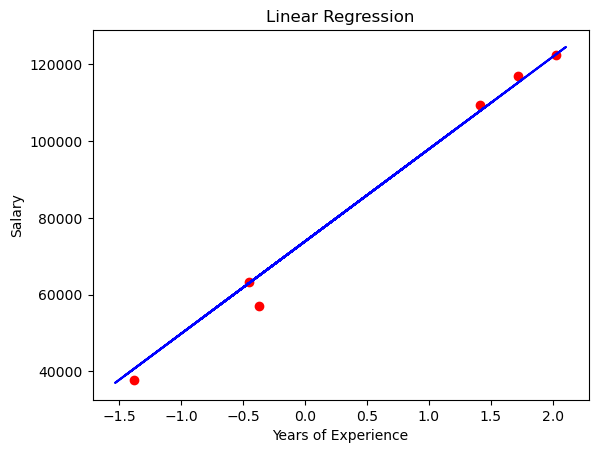

In [22]:
#visualizing the test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor1.predict(X_train), color = 'blue')
plt.title('Linear Regression')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()


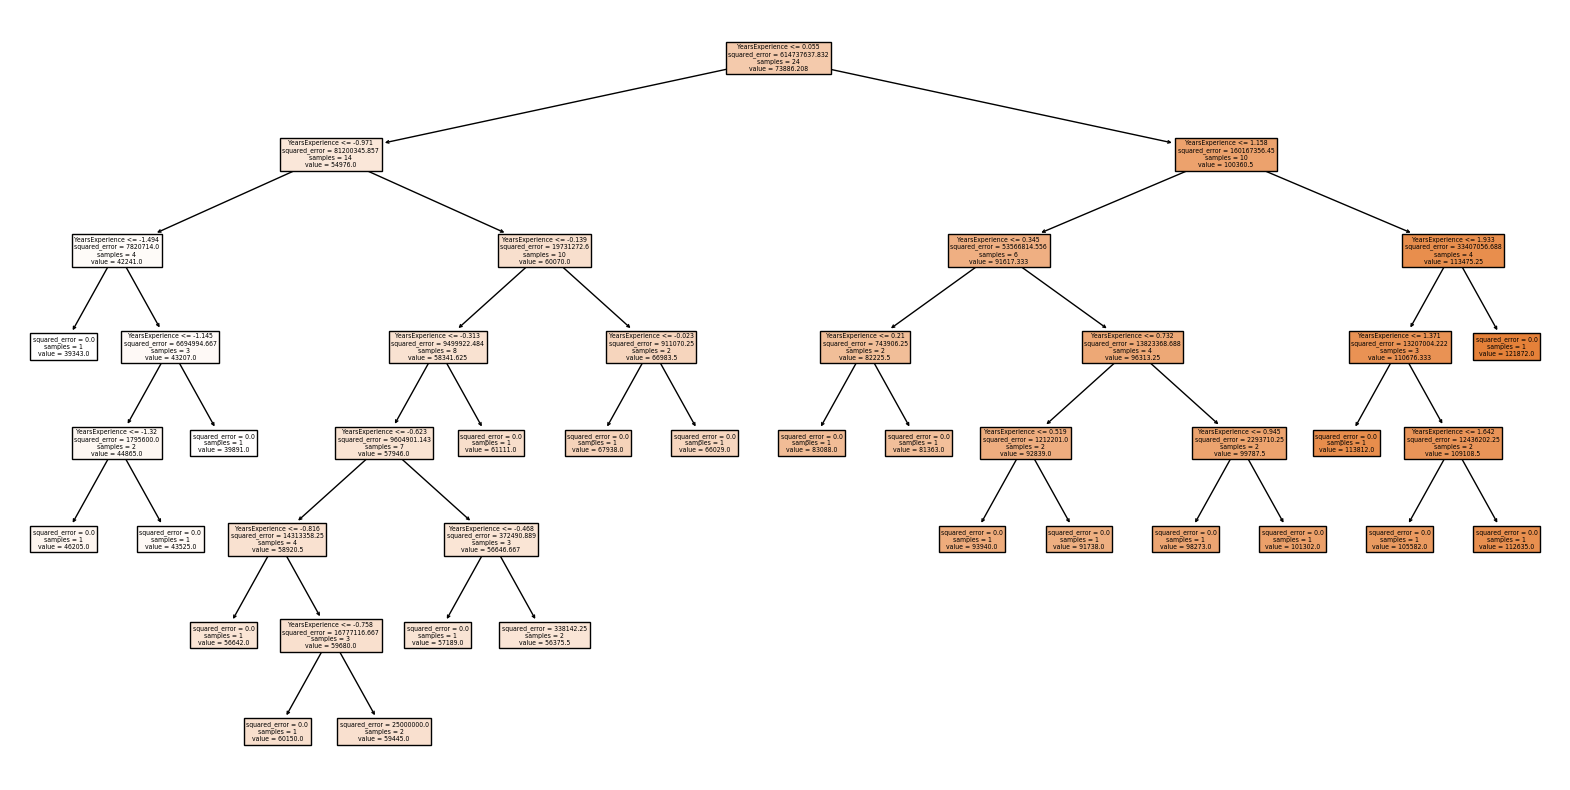

In [23]:
from sklearn.tree import plot_tree
# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(regressor, filled=True, feature_names=['YearsExperience'])
plt.show()

In [24]:
from sklearn.neural_network import MLPRegressor
nn=MLPRegressor(hidden_layer_sizes=(50, 50, 50), activation='relu', 
                         learning_rate='constant', learning_rate_init=0.01, momentum=0.9, 
                         max_iter=1000, random_state=0)
nn.fit(X_train,y_train)
nn_predictions=nn.predict(X_test)
nn_mse=mean_squared_error(y_test,nn_predictions)

In [25]:
print(nn_mse)

450420534.68830436


Text(0.5, 1.0, 'Neural Network Model Structure')

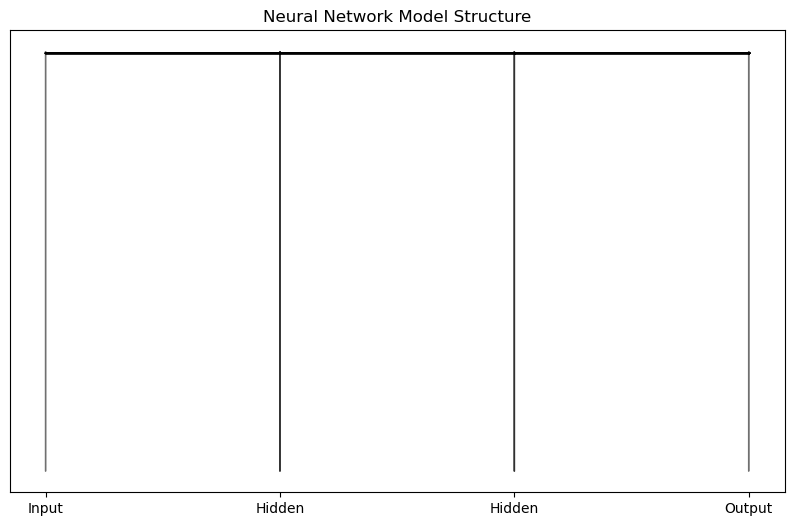

In [26]:
# Get the model's layer sizes
layer_sizes = nn.hidden_layer_sizes + (nn.n_outputs_,)

# Plot the neural network structure
plt.figure(figsize=(10, 6))
for i in range(len(layer_sizes) - 1):
    plt.arrow(i, 0, 0, 1, color='black', alpha=0.5)  # Input to hidden layer arrow
    for j in range(layer_sizes[i]):
        plt.arrow(i, 1, 1, 0, color='black', alpha=0.5)  # Hidden layer to hidden layer arrow
    plt.arrow(i+1, 0, 0, 1, color='black', alpha=0.5)  # Hidden layer to output arrow

plt.xticks(range(len(layer_sizes)), ['Input'] + ['Hidden'] * (len(layer_sizes) - 2) + ['Output'])
plt.yticks([])
plt.title('Neural Network Model Structure')

In [27]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100,random_state=0)
rf.fit(X_train,y_train)
rf_predictions=rf.predict(X_test)
rf_mse=mean_squared_error(y_test,rf_predictions)

In [28]:
print(rf_mse)

22212671.173109498


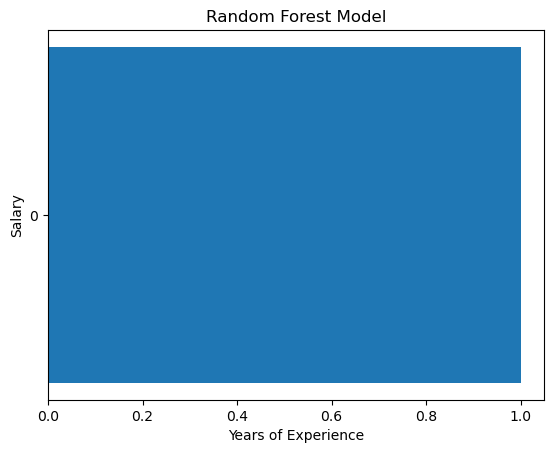

In [29]:
#Plot the feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.barh(range(X_train.shape[1]), importances[indices], align='center')
plt.yticks(range(X_train.shape[1]), range(X_train.shape[1]))
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Random Forest Model')

plt.show()

In [30]:
from sklearn.svm import SVR
svm=SVR(kernel='linear')
svm.fit(X_train,y_train)
svm_predictions=svm.predict(X_test)
svm_mse=mean_squared_error(y_test,svm_predictions)

In [31]:
print(svm_mse)

1451534889.2720077


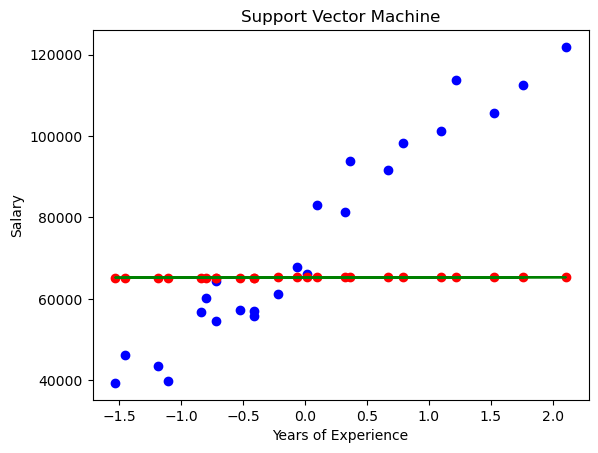

In [32]:
# Plot the support vectors
plt.scatter(X_train, y_train, c='b', label='Training Data')
plt.scatter(svm.support_vectors_, svm.predict(svm.support_vectors_), c='r',
            label='Support Vectors')

# Plot the regression line
plt.plot(X_train, svm.predict(X_train), c='g', label='Regression Line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Support Vector Machine')
plt.show()

In [33]:
import joblib

In [34]:
joblib.dump(regressor,'salarymod_model.pkl')

['salarymod_model.pkl']

In [38]:
loadel_salarymodel=joblib.load('salarymod_model.pkl')

In [39]:
year_of_experience=float(input("please enter  year of experience: "))

please enter  year of experience: 45


In [40]:
new_data=[[year_of_experience]]

In [41]:
predicted_salary=loadel_salarymodel.predict(new_data)

In [43]:
print(f"the salary is {predicted_salary[0]}")

the salary is 121872.0
